In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [9]:
df = pd.read_csv('csv/titanic_train.csv', decimal=',')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C


In [10]:
df.describe()

,PassengerId,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594
std,257.353842,0.486592,0.836071,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000


In [11]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
df = df.drop(['PassengerId'], axis = 1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C


In [13]:
df = df.drop(['Ticket'], axis = 1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.25,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.925,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,13,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30,C148,C


In [14]:
df = df.drop(['Name'], axis = 1)

In [15]:
df['Survived'].unique()
df['Pclass'].unique()
df['Sex'].unique()
df['Age'].unique()

array(['22', '38', '26', '35', nan, '54', '2', '27', '14', '4', '58',
       '20', '39', '55', '31', '34', '15', '28', '8', '19', '40', '66',
       '42', '21', '18', '3', '7', '49', '29', '65', '28.5', '5', '11',
       '45', '17', '32', '16', '25', '0.83', '30', '33', '23', '24', '46',
       '59', '71', '37', '47', '14.5', '70.5', '32.5', '12', '9', '36.5',
       '51', '55.5', '40.5', '44', '1', '61', '56', '50', '36', '45.5',
       '20.5', '62', '41', '52', '63', '23.5', '0.92', '43', '60', '10',
       '64', '13', '48', '0.75', '53', '57', '80', '70', '24.5', '6',
       '0.67', '30.5', '0.42', '34.5', '74'], dtype=object)

In [16]:
df['Age'].unique()

array(['22', '38', '26', '35', nan, '54', '2', '27', '14', '4', '58',
       '20', '39', '55', '31', '34', '15', '28', '8', '19', '40', '66',
       '42', '21', '18', '3', '7', '49', '29', '65', '28.5', '5', '11',
       '45', '17', '32', '16', '25', '0.83', '30', '33', '23', '24', '46',
       '59', '71', '37', '47', '14.5', '70.5', '32.5', '12', '9', '36.5',
       '51', '55.5', '40.5', '44', '1', '61', '56', '50', '36', '45.5',
       '20.5', '62', '41', '52', '63', '23.5', '0.92', '43', '60', '10',
       '64', '13', '48', '0.75', '53', '57', '80', '70', '24.5', '6',
       '0.67', '30.5', '0.42', '34.5', '74'], dtype=object)

In [17]:
df['Age'] = df['Age'].fillna(0)
df['Age'].unique()

array(['22', '38', '26', '35', 0, '54', '2', '27', '14', '4', '58', '20',
       '39', '55', '31', '34', '15', '28', '8', '19', '40', '66', '42',
       '21', '18', '3', '7', '49', '29', '65', '28.5', '5', '11', '45',
       '17', '32', '16', '25', '0.83', '30', '33', '23', '24', '46', '59',
       '71', '37', '47', '14.5', '70.5', '32.5', '12', '9', '36.5', '51',
       '55.5', '40.5', '44', '1', '61', '56', '50', '36', '45.5', '20.5',
       '62', '41', '52', '63', '23.5', '0.92', '43', '60', '10', '64',
       '13', '48', '0.75', '53', '57', '80', '70', '24.5', '6', '0.67',
       '30.5', '0.42', '34.5', '74'], dtype=object)

In [18]:
df['Cabin'] = df['Cabin'].fillna(0)
df['Cabin'].unique()

array([0, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       '

In [19]:
df['Sex'] = df['Sex'].astype('category')
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22,1,0,7.25,0,S
1,1,1,female,38,1,0,71.2833,C85,C
2,1,3,female,26,0,0,7.925,0,S
3,1,1,female,35,1,0,53.1,C123,S
4,0,3,male,35,0,0,8.05,0,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13,0,S
887,1,1,female,19,0,0,30,B42,S
888,0,3,female,0,1,2,23.45,0,S
889,1,1,male,26,0,0,30,C148,C


In [20]:
y, label_sex = pd.factorize(df['Sex'])
df['Sex'] = y
label_sex

CategoricalIndex(['male', 'female'], categories=['female', 'male'], ordered=False, dtype='category')

In [21]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [22]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22,1,0,7.25,0,S
1,1,1,1,38,1,0,71.2833,C85,C
2,1,3,1,26,0,0,7.925,0,S
3,1,1,1,35,1,0,53.1,C123,S
4,0,3,0,35,0,0,8.05,0,S
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,S
887,1,1,1,19,0,0,30,B42,S
888,0,3,1,0,1,2,23.45,0,S
889,1,1,0,26,0,0,30,C148,C


In [23]:
df['Embarked'] = df['Embarked'].astype('category')
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22,1,0,7.25,0,S
1,1,1,1,38,1,0,71.2833,C85,C
2,1,3,1,26,0,0,7.925,0,S
3,1,1,1,35,1,0,53.1,C123,S
4,0,3,0,35,0,0,8.05,0,S
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,S
887,1,1,1,19,0,0,30,B42,S
888,0,3,1,0,1,2,23.45,0,S
889,1,1,0,26,0,0,30,C148,C


In [24]:
_, label_embarked = pd.factorize(df['Embarked'])
df['Embarked'] = _
label_embarked

CategoricalIndex(['S', 'C', 'Q'], categories=['C', 'Q', 'S'], ordered=False, dtype='category')

In [25]:
_

array([ 0,  1,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  1,  0,  0,  2,  0,  0,  0,  1,  0,  2,  0,  1,  1,  2,  0,
        1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  2,  0,  2,  2,  1,  0,  0,
        0,  1,  0,  1,  0,  0,  1,  0,  0,  1, -1,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0,  1,  0,  2,  0,  1,
        0,  0,  0,  1,  0,  0,  1,  2,  0,  1,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  2,
        0,  2,  0,  0,  0,  0,  0,  1,  1,  2,  0,  2,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  2,  1,  0,  0,  0,  0,  2,  1,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0

In [26]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22,1,0,7.25,0,0
1,1,1,1,38,1,0,71.2833,C85,1
2,1,3,1,26,0,0,7.925,0,0
3,1,1,1,35,1,0,53.1,C123,0
4,0,3,0,35,0,0,8.05,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,0
887,1,1,1,19,0,0,30,B42,0
888,0,3,1,0,1,2,23.45,0,0
889,1,1,0,26,0,0,30,C148,1


In [27]:
df['Cabin'] = df['Cabin'].astype('category')
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22,1,0,7.25,0,0
1,1,1,1,38,1,0,71.2833,C85,1
2,1,3,1,26,0,0,7.925,0,0
3,1,1,1,35,1,0,53.1,C123,0
4,0,3,0,35,0,0,8.05,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,0
887,1,1,1,19,0,0,30,B42,0
888,0,3,1,0,1,2,23.45,0,0
889,1,1,0,26,0,0,30,C148,1


In [28]:
z, label_Cabin = pd.factorize(df['Cabin'])
df['Cabin'] = z
label_Cabin

CategoricalIndex([0, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
                  'C23 C25 C27', 'B78',
                  ...
                  'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50',
                  'B42', 'C148'],
                 categories=[0, 'A10', 'A14', 'A16', ..., 'F38', 'F4', 'G6', 'T'], ordered=False, dtype='category', length=148)

In [29]:
z

array([  0,   1,   0,   2,   0,   0,   3,   0,   0,   0,   4,   5,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   6,   0,   7,   0,   0,
         0,   8,   0,   0,   0,   9,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        10,   0,  11,  12,   0,   0,   0,   0,   0,  13,  14,   0,   0,
         0,  15,   0,   0,   0,   0,   0,   0,   0,   0,  16,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8,   0,   0,
         0,  17,   0,   0,   0,  18,  19,   0,   0,   0,   0,  20,   0,
         0,   0,   0,   0,   0,   0,  21,   0,   0,   0,   0,   0,   0,
         0,  22,   0,   0,   0,   0,  23,  20,   0,   0,   0,  24,   0,
         0,   0,   0,   0,   0,   0,  25,   2,   0,  26,   0,   0,   0,
         0,   0,   0,   0,   0,  27,   0,   0,  28,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29,   0,   0,
         0,  30,   0,   0,   0,  31,   0,   0,  32,   0,   0,   

In [30]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22,1,0,7.25,0,0
1,1,1,1,38,1,0,71.2833,1,1
2,1,3,1,26,0,0,7.925,0,0
3,1,1,1,35,1,0,53.1,2,0
4,0,3,0,35,0,0,8.05,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,0
887,1,1,1,19,0,0,30,146,0
888,0,3,1,0,1,2,23.45,0,0
889,1,1,0,26,0,0,30,147,1


In [31]:
df.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1684\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked
Survived,1.000000,-0.338481,0.543351,-0.035322,0.081629,0.270495,0.101849
Pclass,-0.338481,1.000000,-0.131900,0.083081,0.018443,-0.623554,0.050992
Sex,0.543351,-0.131900,1.000000,0.114631,0.245489,0.082104,0.111249
SibSp,-0.035322,0.083081,0.114631,1.000000,0.414838,-0.058893,-0.058008
Parch,0.081629,0.018443,0.245489,0.414838,1.000000,-0.003678,-0.076625
Cabin,0.270495,-0.623554,0.082104,-0.058893,-0.003678,1.000000,0.017855
Embarked,0.101849,0.050992,0.111249,-0.058008,-0.076625,0.017855,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1684\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

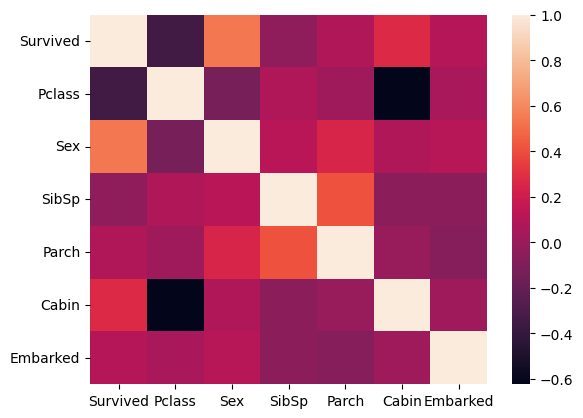

In [32]:
sns.heatmap(df.corr())

In [33]:
x = df.values[:,1:]
y = df.values[:,0]

In [34]:
batas = df.values.shape[0] * 8//10
x_train = x[ : batas]
y_train = y[ : batas]
x_test = x[batas:]
y_test = y[batas:]

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 8)
(712,)
(179, 8)
(179,)


In [36]:
print(x_train)
print(y_train)

[[3 0 '22' ... '7.25' 0 0]
 [1 1 '38' ... '71.2833' 1 1]
 [3 1 '26' ... '7.925' 0 0]
 ...
 [3 0 0 ... '15.2458' 0 1]
 [1 1 '24' ... '49.5042' 122 1]
 [1 0 0 ... '26.55' 64 0]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0

In [37]:
!pip install sklearn

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=7)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test)
y_pred

ValueError: Unknown label type: 'unknown'

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)


0.7597765363128491

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
y_pred

array([0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8044692737430168

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
y_pred

array([0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0.])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8603351955307262

In [ ]:
from sklearn.cluster import KMeans
otak = KMeans(n_clusters = 2)
otak.fit(x_train)
y_train_pred = otak.predict(x_train)
y_train_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x_train, y_train_pred)
print("akurasi = ",score)


akurasi =  0.660314931460996


In [ ]:
from sklearn.cluster import KMeans
otak = KMeans(n_clusters = 3)
otak.fit(x_train)
y_train_pred = otak.predict(x_train)
y_train_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1,

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x_train, y_train_pred)
print("akurasi = ",score)

akurasi =  0.6395729273843171


In [ ]:
from sklearn.cluster import KMeans
otak = KMeans(n_clusters = 4)
otak.fit(x_train)
y_train_pred = otak.predict(x_train)
y_train_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 1, 3, 2, 0,

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x_train, y_train_pred)
print("akurasi = ",score)

akurasi =  0.6243452697734272


In [ ]:
from sklearn.cluster import KMeans
otak = KMeans(n_clusters = 5)
otak.fit(x_train)
y_train_pred = otak.predict(x_train)
y_train_pred

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 4, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 3, 1, 0,

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x_train, y_train_pred)
print("akurasi = ",score)

akurasi =  0.6272875992528015


In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(4,input_dim=8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 2)                 10        
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(
    x,
    y,
    batch_size = 1,
    epochs = 10,
    validation_split = 0.2
)

NameError: name 'x' is not defined

In [ ]:
y_pred = model.predict(x_test)
y_pred

6/6 [==============================] - 0s 398us/step


array([[0.53261405],
       [0.16080183],
       [0.1107308 ],
       [0.57816535],
       [0.6020807 ],
       [0.57816535],
       [0.27621377],
       [0.12490645],
       [0.5668749 ],
       [0.2236808 ],
       [0.21923734],
       [0.11994573],
       [0.5675685 ],
       [0.21410546],
       [0.43314612],
       [0.39681324],
       [0.46143052],
       [0.27409774],
       [0.6020807 ],
       [0.3610063 ],
       [0.50637716],
       [0.31579342],
       [0.31579342],
       [0.23344387],
       [0.3456234 ],
       [0.6020807 ],
       [0.31184006],
       [0.31184006],
       [0.57816535],
       [0.31268397],
       [0.6020807 ],
       [0.24183911],
       [0.1362936 ],
       [0.44830075],
       [0.374     ],
       [0.4179908 ],
       [0.5849854 ],
       [0.15240292],
       [0.52380866],
       [0.57816535],
       [0.13801582],
       [0.18437965],
       [0.6020807 ],
       [0.35491154],
       [0.151936  ],
       [0.34362113],
       [0.12199999],
       [0.602